# DATA COLLECTION

In [1]:
!pip install --upgrade pip

In [2]:
#!pip3 install twint
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio
!pip install twint


In [3]:
conda install git


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
#!pip install --user --upgrade git+https://github.com/twintproject/twint.git@master#egg=twint
#!pip uninstall -y twint
#!pip install --user git+git://github.com/ajctrl/twint@patch-1
#!pip show twint --version
    
#fixes
    #!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint;
#pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint;
#!pip3 uninstall twint
#!pip3 install git+git://github.com/ajctrl/twint@patch-1
    

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\sram\appdata\local\temp\pip-install-_yakmz1i\twint_af353b58d7bf4918a3cc7c8fd90e5978


  Running command git clone -q https://github.com/twintproject/twint.git 'C:\Users\SRam\AppData\Local\Temp\pip-install-_yakmz1i\twint_af353b58d7bf4918a3cc7c8fd90e5978'
  Running command git checkout -q origin/master


In [5]:
#may need to use API crdentials

In [6]:
conda install -c conda-forge/label/gcc7 missingno 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install plotly

#scientific and machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#plotting options
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
#% matplotlib inline
pd.set_option('display.max_colwidth',None)
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#twint
import twint
#to avoid problems with running twint
import nest_asyncio
nest_asyncio.apply()


In [8]:
!pip install spacy

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import datetime

import plotly.express as px

#nltk.download('punkt')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

stemmer = PorterStemmer()

In [9]:
## Sources: 

keywords = ["Covid Theatres", "Covid Sports", "Covid Opera", "Covid Gaming", "Covid Live Performances", "Covid Museums", "Covid Movies", "Covid Music", "Covid Art Culture", "Covid Dancing" ,"Covid casino", "Covid Symphony", "Covid Circus", "covid Recreational", "covid amusement parks", "covid cinema", "covid infotainment", "covid comedy", "covid auditorium", "covid concert", "covid tournaments" ]

search_concatenation = keywords


In [10]:
search_concatenation

['Covid Theatres',
 'Covid Sports',
 'Covid Opera',
 'Covid Gaming',
 'Covid Live Performances',
 'Covid Museums',
 'Covid Movies',
 'Covid Music',
 'Covid Art Culture',
 'Covid Dancing',
 'Covid casino',
 'Covid Symphony',
 'Covid Circus',
 'covid Recreational',
 'covid amusement parks',
 'covid cinema',
 'covid infotainment',
 'covid comedy',
 'covid auditorium',
 'covid concert',
 'covid tournaments']

In [11]:
len(search_concatenation)

21

In [12]:
# the concept is to perform the scraping using the elements in the lists above: imm_basic, immigrant_mod, migrant_mod and refugee_mod
df = []
for s in search_concatenation:
    config = twint.Config()
    config.Search = s
    config.Lang = "en"
    config.Limit = 1000
    config.Since = "2020-11-01 00:00:00"
    config.Until = "2021-03-31 00:00:00"
    config.Hide_output = True
    config.Pandas = True
    twint.run.Search(config)
    Tweets_df = twint.storage.panda.Tweets_df
    df.append(Tweets_df)  
#print(Tweets_df)   
    
# see pd.concat documentation for more info
df1 = pd.concat(df).sort_values(by=['date']).reset_index()
print(df1)

#print(len(df))

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
       index                   id      conversation_id    created_at  \
0        979  1322794208999124992  1322794208999124992  1.604210e+12   
1        978  1322858462045351937  1322858462045351937  1.604229e+12   
2        977  1322872793789308929  1322872793789308929  1.604232e+12   
3        976  1322992123369656320  1322988926525648896  1.604261e+12   
4        591  1323105081990897664  1323105081990897664  1.604288e+12   
...      ...                  ...                  ...           ...   
20485      0  1376685357371023362  1376685357371023362  1.617062e+12   
20486      0  1376685382675406848  1376685382675406848  1.617062e+12   
20487      0  1376685428431069184  1376685428431069184  1.617062e+12   
20488      0  1376685560081829890  13

In [13]:
#outputs number of rows and columns 
df1.shape

(20490, 39)

In [14]:
# with this command I'm checking 
df1.groupby('search').sum().shape, len(search_concatenation)


((21, 9), 21)

In [15]:
#Save Uncleaned Data
df1.to_csv('uncleaned_data_art_entertainment.csv')

In [16]:
df=pd.read_csv('uncleaned_data_art_entertainment.csv')

In [17]:

#am here today -jan26
##Merge all the data scraped from every week

Week1_Tweets = pd.read_csv("uncleaned_data_art_entertainment.csv")
#Week2_Tweets = pd.read_csv("tweets2.csv")

In [18]:
df=Week1_Tweets
df.head(30)

,Unnamed: 0,index,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,979,1322794208999124992,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,-400,NaN,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,978,1322858462045351937,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,-400,NaN,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,977,1322872793789308929,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,-400,NaN,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,976,1322992123369656320,1322988926525648896,1.604261e+12,2020-11-01 15:01:16,-400,NaN,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Brevesdepresse', 'name': 'Brèves de presse', 'id': '472852289'}]",NaN,NaN,NaN,NaN
4,4,591,1323105081990897664,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,-400,NaN,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,5,590,1323113583371259904,1323113583371259904,1.604290e+12,2020-11-01 23:03:55,-400,NaN,"Hi! If you’re STILL going out to places you have no need to go to (I.e. amusement parks, casinos, parties, large weddings, etc) then I have absolutely no sympathy for you and if my parents die of covid then I will personally rip you a new one for participating!!!!!",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,6,975,1323159460144205825,1323159460144205825,1.604301e+12,2020-11-02 02:06:13,-400,NaN,“Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue!“ 👏🏻👏🏻👏🏻 Visit it’s site to catch up with last Thursday’s wonderful film about Cuba and Cuban music. @sandsfilmscine @sandsfilmscine,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
7,7,974,1323172999529406467,1323172999529406467,1.604304e+12,2020-11-02 03:00:01,-400,NaN,"La BD, le cinéma, l’art, la culture ´, l’histoire à nouveau dans les premières victimes de la Covid-19. @R_Bachelot @PatheGaumont @RiadSattouf Pour moi la première grosse frustration du confinement v2.0 https://t.co/sqzB2hX9pT",fr,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,8,973,1323251625146896385,1323251625146896385,1.604323e+12,2020-11-02 08:12:26,-400,NaN,Old Vic to livestream full production of A Christmas Carol https://t.co/7neAQsEluj Sands proudly doing costumes on this show. Fittings by video links to comply with Covid restrictions. Continue work in the middle of this crisis because without Art and Culture our humanity fades.,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,9,972,1323329264880529408,1323329264880529408,1.604341e+12,2020-11-02 13:20:57,-400,NaN,A New Digital Archive Preserves Black Lives Matter &amp; COVID-19 Street Art | Open Culture https://t.co/chorrNG5CJ,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20490 entries, 0 to 20489
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20490 non-null  int64  
 1   index            20490 non-null  int64  
 2   id               20490 non-null  int64  
 3   conversation_id  20490 non-null  int64  
 4   created_at       20490 non-null  float64
 5   date             20490 non-null  object 
 6   timezone         20490 non-null  int64  
 7   place            28 non-null     object 
 8   tweet            20490 non-null  object 
 9   language         20490 non-null  object 
 10  hashtags         20490 non-null  object 
 11  cashtags         20490 non-null  object 
 12  user_id          20490 non-null  int64  
 13  user_id_str      20490 non-null  int64  
 14  username         20490 non-null  object 
 15  name             20486 non-null  object 
 16  day              20490 non-null  int64  
 17  hour        

In [20]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 20489
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20490 non-null  int64  
 1   index            20490 non-null  int64  
 2   id               20490 non-null  int64  
 3   conversation_id  20490 non-null  int64  
 4   created_at       20490 non-null  float64
 5   date             20490 non-null  object 
 6   timezone         20490 non-null  int64  
 7   place            28 non-null     object 
 8   tweet            20490 non-null  object 
 9   language         20490 non-null  object 
 10  hashtags         20490 non-null  object 
 11  cashtags         20490 non-null  object 
 12  user_id          20490 non-null  int64  
 13  user_id_str      20490 non-null  int64  
 14  username         20490 non-null  object 
 15  name             20486 non-null  object 
 16  day              20490 non-null  int64  
 17  hour        

In [21]:
df.tail()

,Unnamed: 0,index,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
20485,20485,0,1376685357371023362,1376685357371023362,1.617062e+12,2021-03-29 19:59:01,-400,NaN,Thank you Brie Carter fir the job you do a a nurse. Thank you for being on the front lines with COVID 19 &amp; for sharing the music in your heart. Smiling is a great song,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
20486,20486,0,1376685382675406848,1376685382675406848,1.617062e+12,2021-03-29 19:59:07,-400,NaN,Classy Tennis Balls Pattern Sports Premium Face Mask | https://t.co/gDDpC2LWjN https://t.co/htT6SBMod8 #tennis #covid #facemasks #covid19 #coronavirus #socialdistancing,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
20487,20487,0,1376685428431069184,1376685428431069184,1.617062e+12,2021-03-29 19:59:18,-400,NaN,"Not only was this the best movie night, it was a turning point in my mindset early in 2020. This was the first time after COVID started that I was able to enjoy anything. I was in a bad head place and this night helped knock me out of it. I’ll never forget it. @nuekerk https://t.co/N6JmgAp7yE",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
20488,20488,0,1376685560081829890,1376670014590263296,1.617062e+12,2021-03-29 19:59:49,-400,NaN,@SoniaFurstenau I look at youth b4 Covid. Yes their upset now. No bars. No concerts and drugs. No hanging in clusters at 7-11. No clogging the Malls. Yup. It's sad.,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SoniaFurstenau', 'name': 'Sonia Furstenau', 'id': '2358617670'}]",NaN,NaN,NaN,NaN
20489,20489,0,1376685598921084932,1376685598921084932,1.617062e+12,2021-03-29 19:59:59,-400,NaN,Please share! Let's stop dancing around mental health conversations. https://t.co/Ll8CxgVeXx #waltswaltz #anxietyawareness #mentalhealth #anxiety #mentalhealthawareness #selfcare #covid https://t.co/xzn4XXnxHm,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'conversation_id', 'created_at', 'date',
       'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link',
       'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [23]:
df1=df.drop(['Unnamed: 0','index','conversation_id',
       'timezone', 'place','user_id_str', 'username', 'name', 'day', 'hour', 'link',
            'photos', 'video', 'thumbnail','nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],axis=1)

In [24]:
df1.head()

,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet
0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False
1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False
2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False
3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False
4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False


In [25]:
df1.columns

Index(['id', 'created_at', 'date', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'urls', 'retweet'],
      dtype='object')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 20489
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20490 non-null  int64  
 1   created_at  20490 non-null  float64
 2   date        20490 non-null  object 
 3   tweet       20490 non-null  object 
 4   language    20490 non-null  object 
 5   hashtags    20490 non-null  object 
 6   cashtags    20490 non-null  object 
 7   user_id     20490 non-null  int64  
 8   urls        20490 non-null  object 
 9   retweet     20490 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [27]:
df1['tweet'].nunique()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 20489
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20490 non-null  int64  
 1   created_at  20490 non-null  float64
 2   date        20490 non-null  object 
 3   tweet       20490 non-null  object 
 4   language    20490 non-null  object 
 5   hashtags    20490 non-null  object 
 6   cashtags    20490 non-null  object 
 7   user_id     20490 non-null  int64  
 8   urls        20490 non-null  object 
 9   retweet     20490 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [28]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SRam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [30]:
import re 
from textblob import TextBlob 
import emoji  


import re 
from textblob import TextBlob 
import emoji  
def clean_tweet(tweet): 
    tweet = re.sub(r'@[A-Za-z0-9]+', '', str(tweet)) # remove @mentions
    tweet = re.sub(r'#', '',  str(tweet)) # remove the '#' symbol
    tweet = re.sub(r'RT[\s]+', '',  str(tweet)) # remove RT
    tweet = re.sub(r'https?\/\/S+', '',  str(tweet)) # remove the hyperlink
    tweet = re.sub(r'http\S+', '',  str(tweet)) # remove the hyperlink
    tweet = re.sub(r'www\S+', '',  str(tweet)) # remove the www
    tweet = re.sub(r'twitter+', '',  str(tweet)) # remove the twiiter
    tweet = re.sub(r'pic+', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'com', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'africa', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'innovation', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'covid-19', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'coronavirus', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'technology', '',  str(tweet)) # remove the pic

    return tweet


def remove_emoji(tweet):
    return emoji.get_emoji_regexp().sub(u'', tweet)



In [31]:
df1['cleaned_text']=df1['tweet'].apply(clean_tweet)

In [32]:
df1['cleaned_text']=df1['cleaned_text'].apply(remove_emoji)

In [33]:
# Remove stop words
df1['cleaned_text'] = df1['cleaned_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [34]:
df1.head(20)

,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text
0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture"
1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance
2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.
3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid."
4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers
5,1323113583371259904,1.604290e+12,2020-11-01 23:03:55,"Hi! If you’re STILL going out to places you have no need to go to (I.e. amusement parks, casinos, parties, large weddings, etc) then I have absolutely no sympathy for you and if my parents die of covid then I will personally rip you a new one for participating!!!!!",en,[],[],181655284,[],False,"hi! if you’re still going places need go (i.e. amusement parks, casinos, parties, large weddings, etc) i absolutely sympathy parents die covid i personally rip new one participating!!!!!"
6,1323159460144205825,1.604301e+12,2020-11-02 02:06:13,“Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue!“ 👏🏻👏🏻👏🏻 Visit it’s site to catch up with last Thursday’s wonderful film about Cuba and Cuban music. @sandsfilmscine @sandsfilmscine,en,[],[],303622808,[],False,“sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue!“ visit it’s site catch last thursday’s wonderful film cuba cuban music.
7,1323172999529406467,1.604304e+12,2020-11-02 03:00:01,"La BD, le cinéma, l’art, la culture ´, l’histoire à nouveau dans les premières victimes 

In [35]:
df1.to_csv("CLEANED_DATA_afterhygiene_mar29_art_entertainment.csv")

In [36]:
#Data Analysis¶

In [37]:
#running below code to extract necessary routines to run wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [38]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [39]:
df1=pd.read_csv('CLEANED_DATA_afterhygiene_mar29_art_entertainment.csv')
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text
0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture"
1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance
2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.
3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid."
4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers


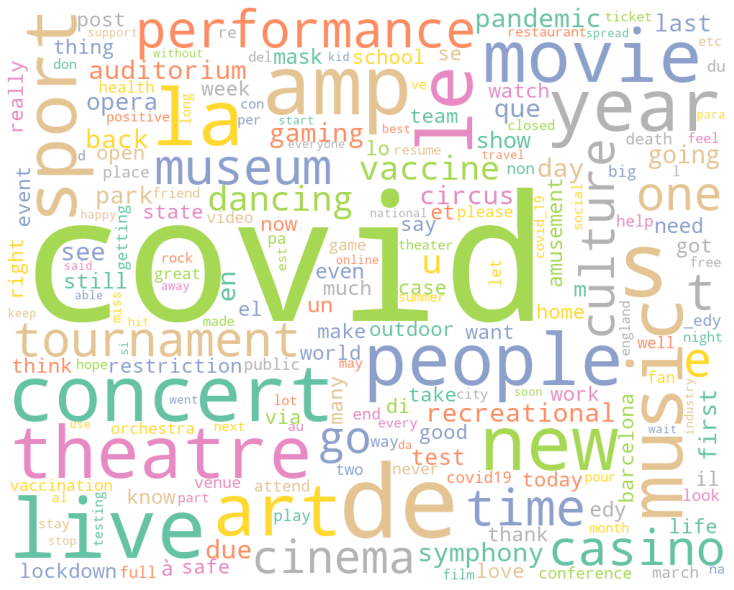

In [40]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [41]:
# get functionality of subjectivity and polarity 
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [42]:
df1.dropna(subset=['cleaned_text'], inplace = True)
df1.reset_index(drop=True, inplace=True)

In [43]:
df1['Subjectivity'] = df1['cleaned_text'].apply(getSubjectivity)
df1['Polarity'] = df1['cleaned_text'].apply(getPolarity)
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity
0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000
1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000
2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667
3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000
4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000


In [44]:
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df1['Analysis_Polarity'] = df1['Polarity'].apply(get_Polarity_Analysis)

df1['Analysis_Subjectivity'] = df1['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df1.head(20)



,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000,Neutral,Fact
1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000,Neutral,Fact
2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667,Positive,Opinion
3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000,Neutral,Fact
4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000,Negative,Opinion
5,5,1323113583371259904,1.604290e+12,2020-11-01 23:03:55,"Hi! If you’re STILL going out to places you have no need to go to (I.e. amusement parks, casinos, parties, large weddings, etc) then I have absolutely no sympathy for you and if my parents die of covid then I will personally rip you a new one for participating!!!!!",en,[],[],181655284,[],False,"hi! if you’re still going places need go (i.e. amusement parks, casinos, parties, large weddings, etc) i absolutely sympathy parents die covid i personally rip new one participating!!!!!",0.520779,0.207609,Positive,Opinion
6,6,1323159460144205825,1.604301e+12,2020-11-02 02:06:13,“Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue!“ 👏🏻👏🏻👏🏻 Visit it’s site to catch up with last Thursday’s wonderful film about Cuba and Cuban music. @sandsfilmscine @sandsfilmscine,en,[],[],303622808,[],False,“sands films continue deliver art 

In [45]:
df1.to_csv("PolaritySubjectivityInnovation_mar29_art_entertainment.csv")

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20489 non-null  int64  
 1   id                     20489 non-null  int64  
 2   created_at             20489 non-null  float64
 3   date                   20489 non-null  object 
 4   tweet                  20489 non-null  object 
 5   language               20489 non-null  object 
 6   hashtags               20489 non-null  object 
 7   cashtags               20489 non-null  object 
 8   user_id                20489 non-null  int64  
 9   urls                   20489 non-null  object 
 10  retweet                20489 non-null  bool   
 11  cleaned_text           20489 non-null  object 
 12  Subjectivity           20489 non-null  float64
 13  Polarity               20489 non-null  float64
 14  Analysis_Polarity      20489 non-null  object 
 15  An

In [47]:
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000,Neutral,Fact
1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000,Neutral,Fact
2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667,Positive,Opinion
3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000,Neutral,Fact
4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000,Negative,Opinion


In [48]:
df2=pd.read_csv('PolaritySubjectivityInnovation_mar29_art_entertainment.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000,Neutral,Fact
1,1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000,Neutral,Fact
2,2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667,Positive,Opinion
3,3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000,Neutral,Fact
4,4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000,Negative,Opinion


In [49]:
#provide graphing capability
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

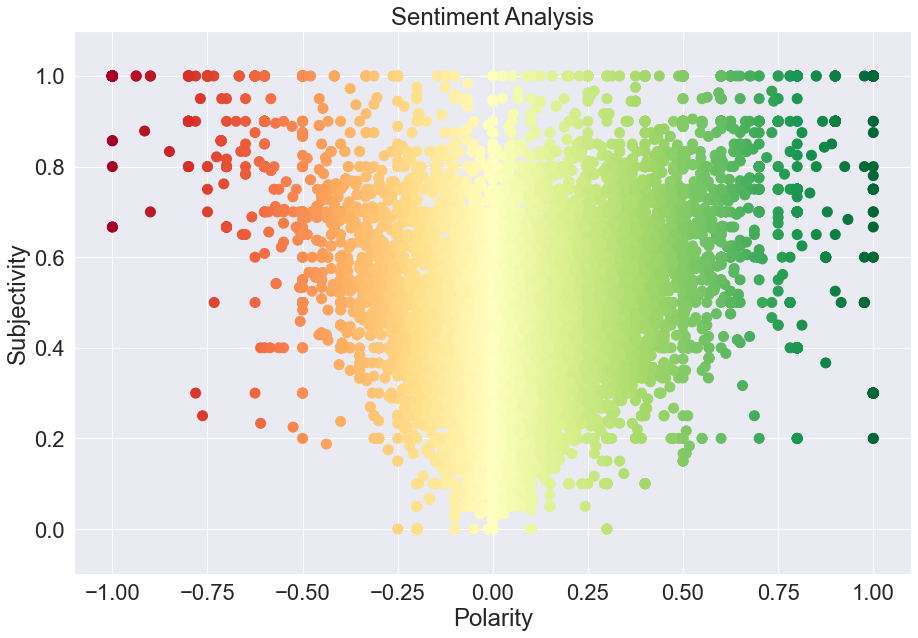

(None,)

In [50]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df2['Polarity'], df2['Subjectivity'], c=df2['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [51]:
# Show the value counts
df2['Analysis_Polarity'].value_counts()

Positive    9802
Neutral     6948
Negative    3739
Name: Analysis_Polarity, dtype: int64

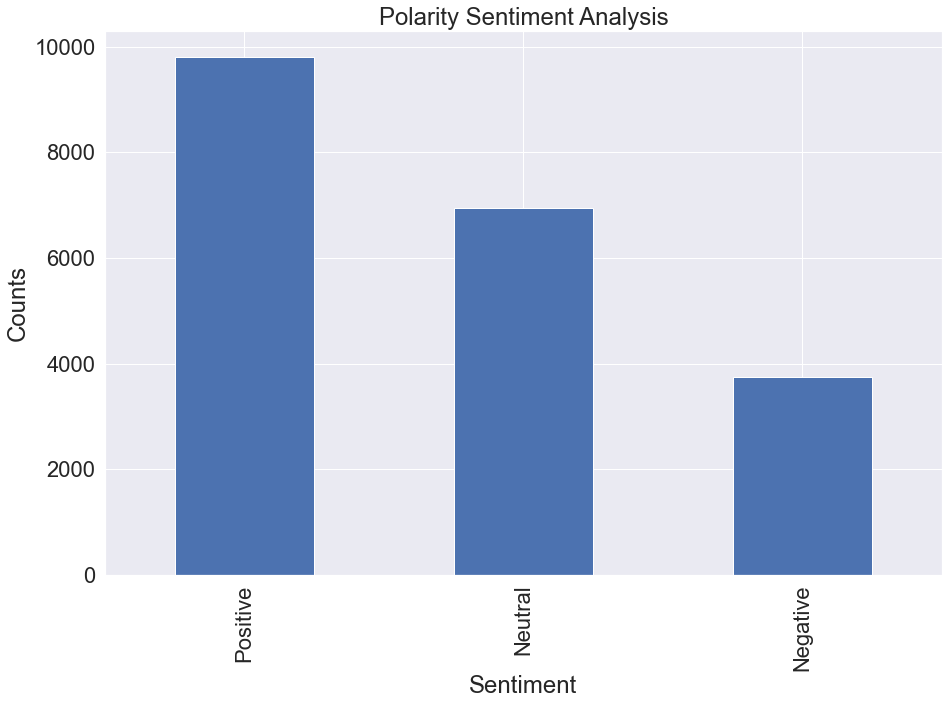

In [52]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df2['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

In [53]:
# Show the value counts
df2['Analysis_Subjectivity'].value_counts()

Opinion    14473
Fact        6016
Name: Analysis_Subjectivity, dtype: int64

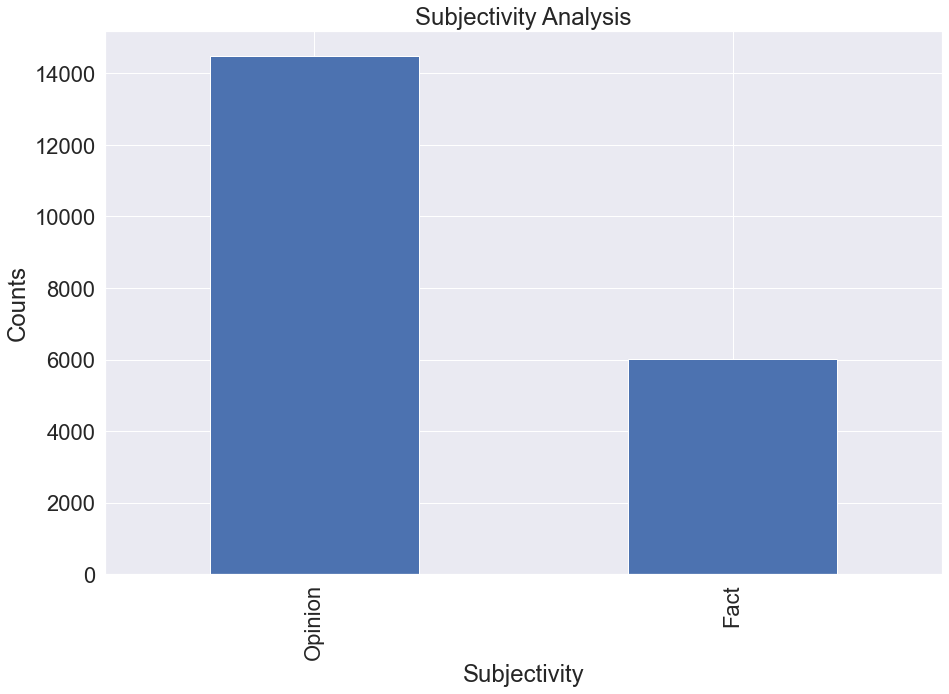

In [54]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Analysis')
plt.xlabel('Subjectivity')
plt.ylabel('Counts')
df2['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

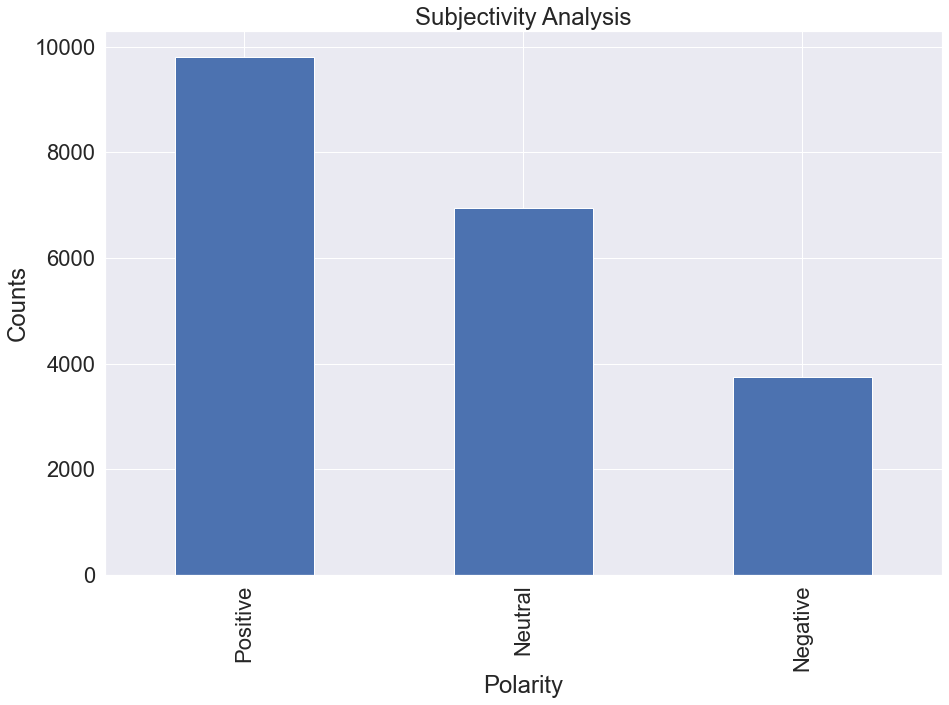

In [55]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Analysis')
plt.xlabel('Polarity')
plt.ylabel('Counts')
df2['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

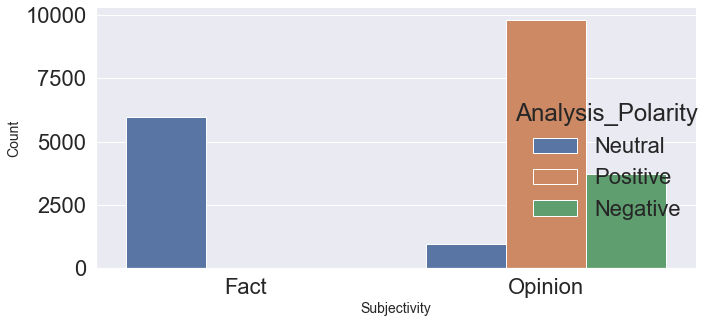

In [56]:
 sns.catplot( x='Analysis_Subjectivity',
             kind="count", 
             hue="Analysis_Polarity", 
             height=5, 
             aspect=1.5, 
             data=df2)
plt.xlabel("Subjectivity", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

In [57]:
conda install -c conda-forge pyldavis


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\SRam\anaconda3

  added / updated specs:
    - pyldavis


The following packages will be UPDATED:


  conda              pkgs/main::conda-4.10.0-py38haa95532_0 --> conda-forge::conda-4.10.0-py38haa244fe_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [58]:
conda install gensim

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\SRam\anaconda3

  added / updated specs:
    - gensim


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.0-py38haa244f~ --> pkgs/main::conda-4.10.0-py38haa95532_0


Note: you may need to restart the kernel to use updated packages.
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



In [59]:
import pyLDAvis
import gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\SRam\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [60]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df2['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(20489, 4516)


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20489 non-null  int64  
 1   Unnamed: 0.1           20489 non-null  int64  
 2   id                     20489 non-null  int64  
 3   created_at             20489 non-null  float64
 4   date                   20489 non-null  object 
 5   tweet                  20489 non-null  object 
 6   language               20489 non-null  object 
 7   hashtags               20489 non-null  object 
 8   cashtags               20489 non-null  object 
 9   user_id                20489 non-null  int64  
 10  urls                   20489 non-null  object 
 11  retweet                20489 non-null  bool   
 12  cleaned_text           20489 non-null  object 
 13  Subjectivity           20489 non-null  float64
 14  Polarity               20489 non-null  float64
 15  An

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
df2.head()

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000,Neutral,Fact
1,1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000,Neutral,Fact
2,2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667,Positive,Opinion
3,3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000,Neutral,Fact
4,4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000,Negative,Opinion


In [63]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df2['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\SRam\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1796: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



(20489, 4516)


In [64]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =5, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =5, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LatentDirichletAllocation(n_components=5, random_state=50)

In [65]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Top 10 words for topic #0:
['post', 'sports', 'circus', 'live', 'online', 'life', 'team', 'march', 'history', 'safe', 'lockdown', 'teams', 'museums', 'times', 'gaming', 'world', 'time', 'ncaa', 'big', 'like', 'new', 'conference', 'amp', 'symphony', 'pandemic', 'museum', 'year', 'culture', 'art', 'tournaments']


Top 10 words for topic #1:
['stop', 'watch', 'got', 'getting', 'theatres', 'right', 'make', 'open', 'good', 'theatre', 'need', 'want', 'auditorium', 'don', 'cinema', 'think', 'time', 'vaccine', 'dancing', 'know', 'movies', 'recreational', 'going', 'amusement', 'parks', 'circus', 'movie', 'amp', 'like', 'people']


Top 10 words for topic #2:
['lockdown', 'testing', 'venues', 'today', 'theatres', 'social', 'national', 'march', 'orchestra', 'cases', 'people', 'vaccine', 'dancing', 'sport', 'health', 'vaccination', 'pandemic', 'auditorium', 'casino', 'resume', 'news', 'england', 'symphony', 'outdoor', 'amp', 'recreational', 'gaming', 'new', 'restrictions', 'sports']


Top 10 words 

In [66]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.107440  0.018354       1        1  29.497057
2     -0.085423 -0.202401       2        1  19.740056
4     -0.118170  0.204243       3        1  19.225721
0     -0.104776 -0.033069       4        1  18.929715
3      0.415810  0.012873       5        1  12.607451, topic_info=         Term         Freq        Total Category  logprob  loglift
2272     live  1864.000000  1864.000000  Default  30.0000  30.0000
3202      que   974.000000   974.000000  Default  29.0000  29.0000
2598    music  1604.000000  1604.000000  Default  28.0000  28.0000
697    cinema  1241.000000  1241.000000  Default  27.0000  27.0000
2749    opera  1087.000000  1087.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
586    casino   356.442363   823.655897   Topic5  -4.4480   1.2333
923   culture   337.554801  1142.802954   Topic5  -4.5025   0.8514
227       art   281.157179  1240.840123   Topic5  -4.6853   0.5863
587   casinos   185.339706   426.521015   Topic5  -5.1020   1.2374
2992     plus   141.090061   215.855723   Topic5  -5.3748   1.6457

[342 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
69        4  0.991497  afterlife
112       1  0.096883    allowed
112       2  0.791208    allowed
112       3  0.053824    allowed
112       4  0.053824    allowed
...     ...       ...        ...
4493      2  0.064843       year
4493      3  0.325816       year
4493      4  0.437089       year
4503      3  0.875207    youtube
4503      4  0.118083    youtube

[609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 1, 4])

In [67]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(20489, 5)

In [68]:
df2.head()

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000,Neutral,Fact
1,1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000,Neutral,Fact
2,2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667,Positive,Opinion
3,3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000,Neutral,Fact
4,4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000,Negative,Opinion


In [69]:
df2['Topic'] = topic_values.argmax(axis=1)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20489 non-null  int64  
 1   Unnamed: 0.1           20489 non-null  int64  
 2   id                     20489 non-null  int64  
 3   created_at             20489 non-null  float64
 4   date                   20489 non-null  object 
 5   tweet                  20489 non-null  object 
 6   language               20489 non-null  object 
 7   hashtags               20489 non-null  object 
 8   cashtags               20489 non-null  object 
 9   user_id                20489 non-null  int64  
 10  urls                   20489 non-null  object 
 11  retweet                20489 non-null  bool   
 12  cleaned_text           20489 non-null  object 
 13  Subjectivity           20489 non-null  float64
 14  Polarity               20489 non-null  float64
 15  An

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [71]:
df4=df2
df4.head()
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20489 non-null  int64  
 1   Unnamed: 0.1           20489 non-null  int64  
 2   id                     20489 non-null  int64  
 3   created_at             20489 non-null  float64
 4   date                   20489 non-null  object 
 5   tweet                  20489 non-null  object 
 6   language               20489 non-null  object 
 7   hashtags               20489 non-null  object 
 8   cashtags               20489 non-null  object 
 9   user_id                20489 non-null  int64  
 10  urls                   20489 non-null  object 
 11  retweet                20489 non-null  bool   
 12  cleaned_text           20489 non-null  object 
 13  Subjectivity           20489 non-null  float64
 14  Polarity               20489 non-null  float64
 15  An

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
df4['Topic']=df4['Topic'].replace({0:'Venues',1:'Performances',2:'Health',3:'Activities',4:'Enjoyment'})

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [73]:
df4.head()
df4.info()
df4['Topic'].head(20)
#df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20489 non-null  int64  
 1   Unnamed: 0.1           20489 non-null  int64  
 2   id                     20489 non-null  int64  
 3   created_at             20489 non-null  float64
 4   date                   20489 non-null  object 
 5   tweet                  20489 non-null  object 
 6   language               20489 non-null  object 
 7   hashtags               20489 non-null  object 
 8   cashtags               20489 non-null  object 
 9   user_id                20489 non-null  int64  
 10  urls                   20489 non-null  object 
 11  retweet                20489 non-null  bool   
 12  cleaned_text           20489 non-null  object 
 13  Subjectivity           20489 non-null  float64
 14  Polarity               20489 non-null  float64
 15  An

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0           Venues
1       Activities
2           Venues
3       Activities
4     Performances
5     Performances
6           Venues
7       Activities
8        Enjoyment
9           Venues
10          Venues
11      Activities
12          Venues
13      Activities
14      Activities
15    Performances
16    Performances
17      Activities
18    Performances
19    Performances
Name: Topic, dtype: object

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 2880x1800 with 0 Axes>

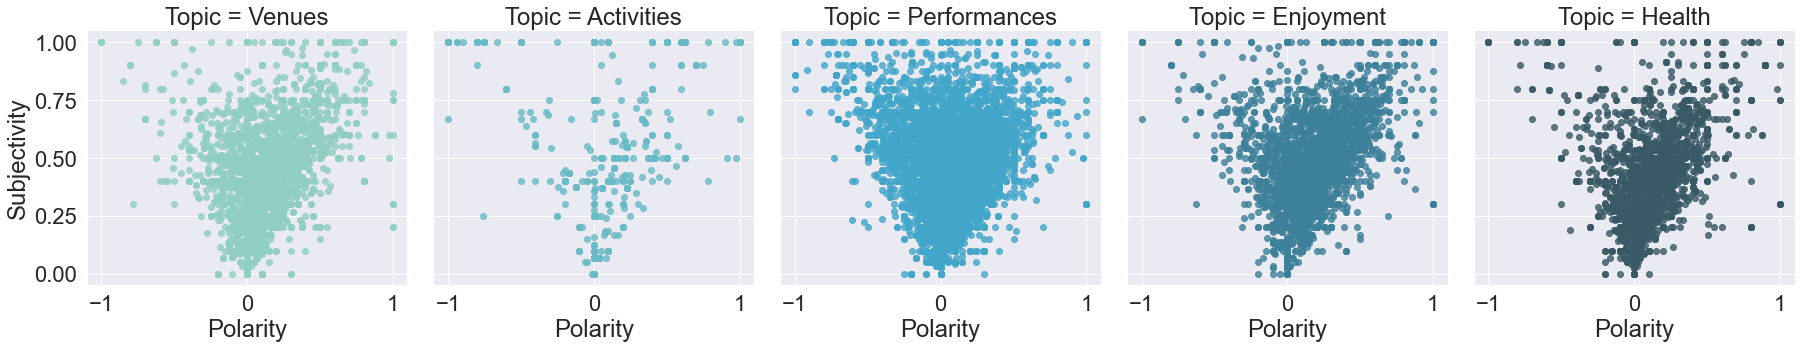

In [74]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df4, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [75]:
#create output file for SAS
df4.head()

df4.to_csv("PolaritySubjectivity_topic_mar29_art_entertainment.csv")


C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
#df4.to_csv("PolaritySubjectivity_topic_mar29_art_entertainment.csv")

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
df4_1 = df4.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df4_1

#df2['Total'] = df2.sum(axis=1)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
Activities,167,2333,310
Enjoyment,531,1014,2512
Health,577,1274,1801
Performances,1798,1413,3230
Venues,666,914,1949


In [78]:
df4_1['Total'] = df4_1.sum(axis=1)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [79]:
df4_1.columns

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [80]:
for i in df4_1:
    df4_1[i] = round(df4_1[i]*100/df4_1.Total)

df4_1

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
Activities,6.0,83.0,11.0,100.0
Enjoyment,13.0,25.0,62.0,100.0
Health,16.0,35.0,49.0,100.0
Performances,28.0,22.0,50.0,100.0
Venues,19.0,26.0,55.0,100.0


In [81]:
df4=df4.fillna(0)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [82]:
df4.head()
df4.info()

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20489 non-null  int64  
 1   Unnamed: 0.1           20489 non-null  int64  
 2   id                     20489 non-null  int64  
 3   created_at             20489 non-null  float64
 4   date                   20489 non-null  object 
 5   tweet                  20489 non-null  object 
 6   language               20489 non-null  object 
 7   hashtags               20489 non-null  object 
 8   cashtags               20489 non-null  object 
 9   user_id                20489 non-null  int64  
 10  urls                   20489 non-null  object 
 11  retweet                20489 non-null  bool   
 12  cleaned_text           20489 non-null  object 
 13  Subjectivity           20489 non-null  float64
 14  Polarity               20489 non-null  float64
 15  An

In [83]:
#df4= df4.drop(['Total'], axis=1)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [84]:
df4.head()

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000,Neutral,Fact,Venues
1,1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000,Neutral,Fact,Activities
2,2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667,Positive,Opinion,Venues
3,3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000,Neutral,Fact,Activities
4,4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000,Negative,Opinion,Performances


In [85]:
df4_1

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
Activities,6.0,83.0,11.0,100.0
Enjoyment,13.0,25.0,62.0,100.0
Health,16.0,35.0,49.0,100.0
Performances,28.0,22.0,50.0,100.0
Venues,19.0,26.0,55.0,100.0


C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



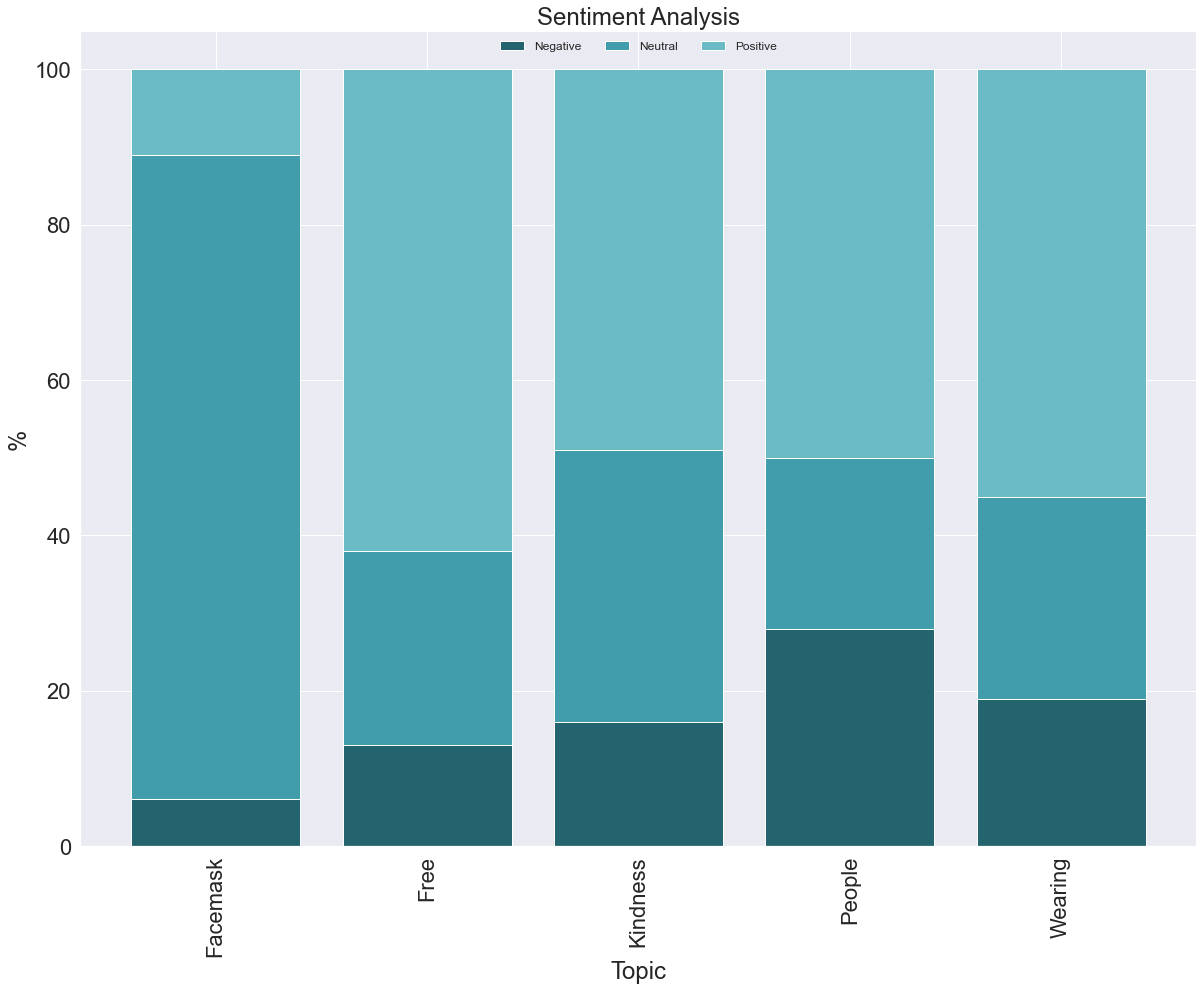

In [86]:
plt.figure(figsize=(20,15)) 


topic = ['Facemask','Free','Kindness','People','Wearing']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df4_1['Negative'], color='#23646e')
p2=plt.bar(topic,df4_1['Neutral'], color='#419dab', bottom=df4_1['Negative'])
p3=plt.bar(topic,df4_1['Positive'], color='#6bbbc7', bottom=df4_1['Neutral']+df4_1['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()


In [87]:
df4['Topic'].value_counts()

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Performances    6441
Enjoyment       4057
Health          3652
Venues          3529
Activities      2810
Name: Topic, dtype: int64

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:xlabel='Topic', ylabel='count'>

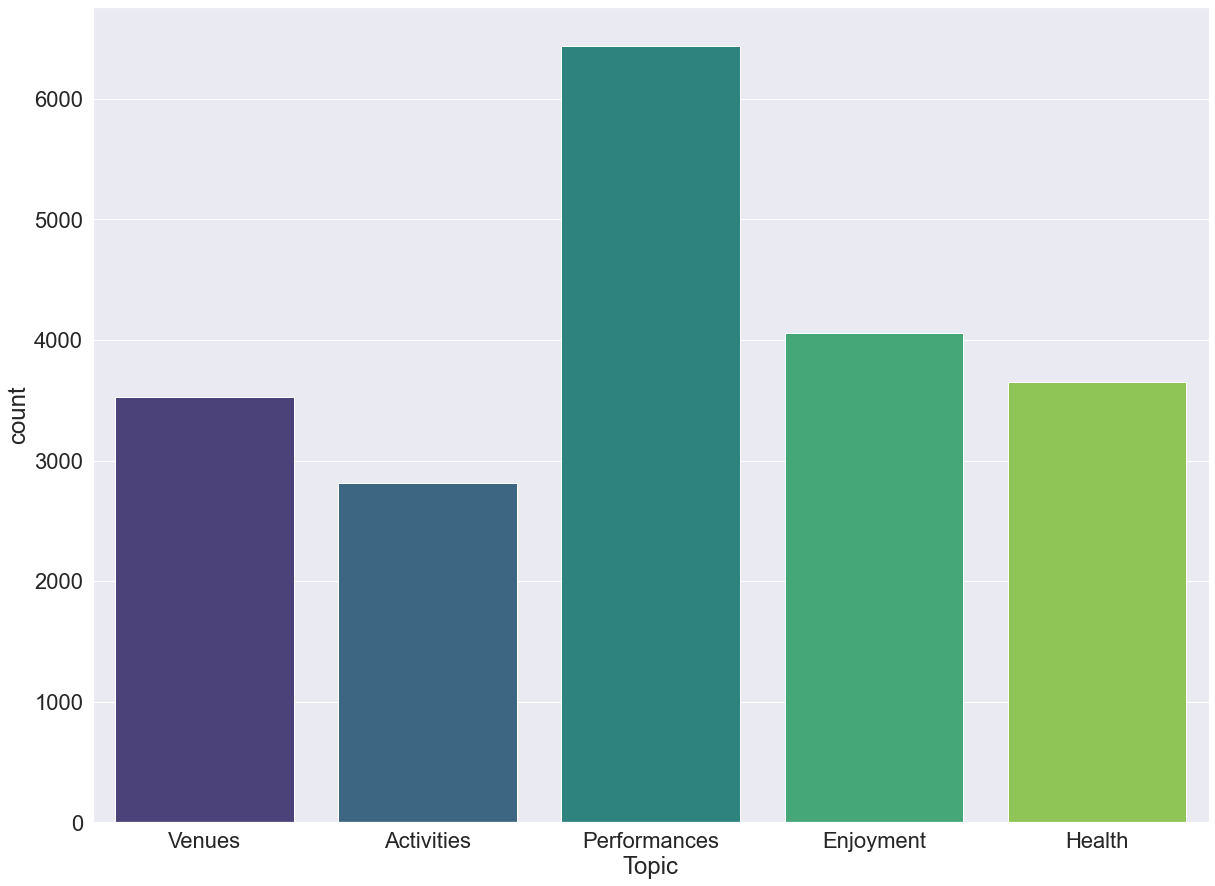

In [88]:
plt.figure(figsize=(20,15)) 
sns.countplot(x = 'Topic',data = df4, palette = 'viridis')


In [89]:
#df4.head()
rng = pd.date_range(start='11/01/2020', end ='03/29/2021',freq='D')


C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [90]:
df5_1 = df4.groupby(['date','Topic'])['cleaned_text'].count().reset_index()

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
df5_1

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,date,Topic,cleaned_text
0,2020-11-01 01:54:50,Venues,1
1,2020-11-01 06:10:09,Activities,1
2,2020-11-01 07:07:06,Venues,1
3,2020-11-01 15:01:16,Activities,1
4,2020-11-01 22:30:08,Performances,1
...,...,...,...
19866,2021-03-29 19:59:01,Enjoyment,1
19867,2021-03-29 19:59:07,Venues,1
19868,2021-03-29 19:59:18,Performances,1
19869,2021-03-29 19:59:49,Performances,1


In [92]:
pivoted = df5_1.pivot( index='date',columns='Topic', values='cleaned_text').reset_index()

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [93]:
pivoted=pivoted.fillna(0)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [94]:
pivoted.to_csv("tweets1_by_date_mar29_art_entertainment.csv")

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KeyError: 'Facemask'

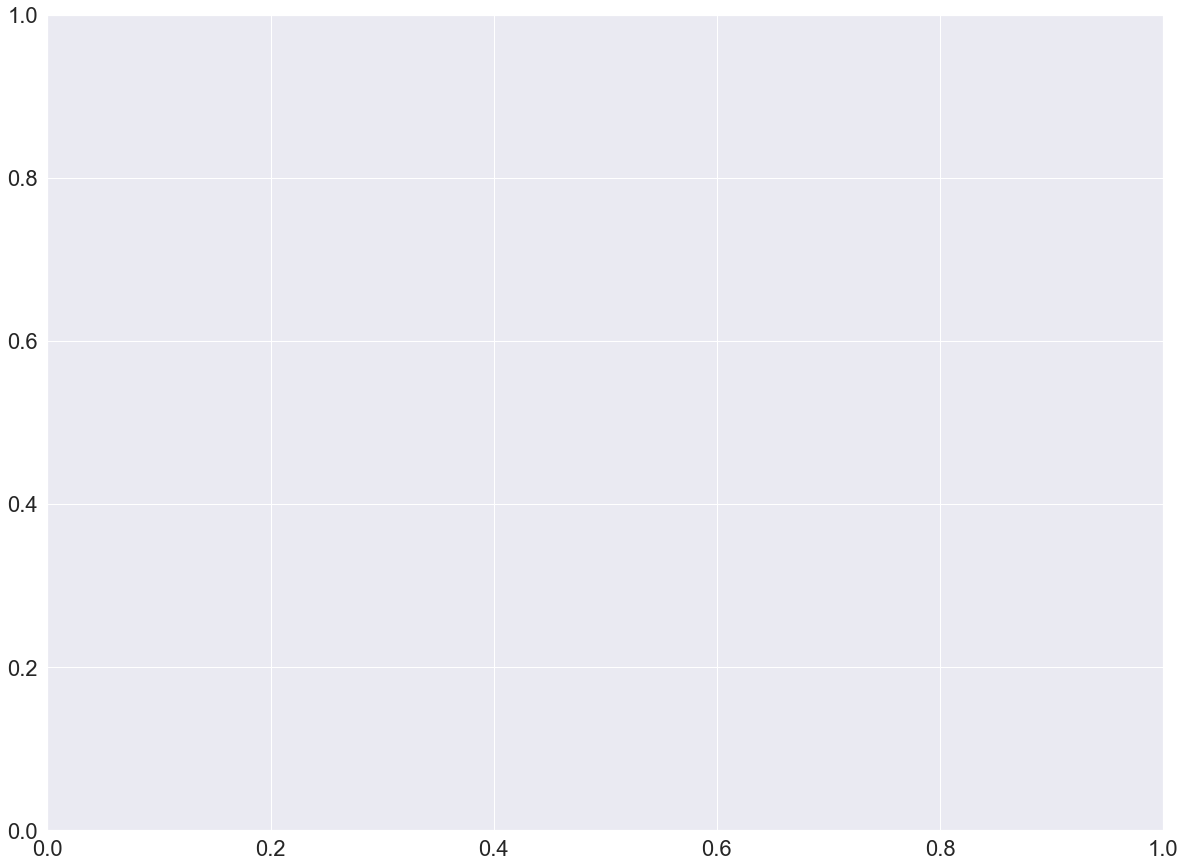

In [95]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,15)) 

# gca stands for 'get current axis'
ax = plt.gca()

pivoted.plot(kind='line', x='date', y='Facemask', label='Facemask',ax=ax)
pivoted.plot(kind='line', x='date', y='Wearing', label='Wearing',ax=ax)
pivoted.plot(kind='line', x='date', y='Kindness', label='Kindness',ax=ax)
pivoted.plot(kind='line', x='date', y='People', label='People',ax=ax)
pivoted.plot(kind='line', x='date', y='Free', label='Free',ax=ax)


# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.legend()
plt.show()



In [97]:
# # Preparing a corpus for analysis and checking first 10 entries
corpus=[]
a=[]
for i in range(len(df4['cleaned_text'])):
    a=df4['cleaned_text'][i]
    corpus.append(a)
        
print(corpus[0:10])

['tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture', 'koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance', 'sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.', "pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.", 'im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers', 'hi! if you’re still going places need go (i.e. amusement parks, casinos, parties, large weddings, etc) i absolutely sympath

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
import os
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# init_notebook_mode(connected=True) #do not miss this line

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [99]:
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

# print(dictionary)
# print(dictionary.token2id)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [100]:
corpus = [dictionary.doc2bow(text) for text in texts]

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [101]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [102]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [103]:
total_topics = 5

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,5)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.046*"covid" + 0.010*"movie" + 0.010*"go" + 0.008*"dancing" + 0.008*"like"'),
 (1,
  '0.033*"covid" + 0.011*"covid-19" + 0.010*"sports" + 0.007*"concert" + 0.006*"&amp;"'),
 (2, '0.043*"de" + 0.017*"la" + 0.017*"covid" + 0.016*"que" + 0.013*"en"'),
 (3, '0.017*"le" + 0.017*"covid" + 0.010*"il" + 0.008*"les" + 0.008*"e"'),
 (4,
  '0.019*"covid" + 0.016*"covid-19" + 0.016*"concert" + 0.011*"music" + 0.009*"barcelona"')]

In [104]:
total_topics = 8

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,8)

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.023*"covid" + 0.020*"covid-19" + 0.017*"sports" + 0.011*"sport" + 0.009*"england" + 0.008*"new" + 0.008*"outdoor" + 0.008*"resume"'),
 (1,
  '0.010*"covid" + 0.007*"athletes" + 0.006*"&amp;" + 0.005*"attended" + 0.005*"comedy" + 0.005*"forum." + 0.004*"va" + 0.004*"screening"'),
 (2,
  '0.027*"covid-19" + 0.020*"sports" + 0.010*"outdoor" + 0.009*"vaccination" + 0.008*"meetings" + 0.007*"&amp;" + 0.006*"new" + 0.006*"covid:"'),
 (3,
  '0.052*"covid" + 0.010*"movie" + 0.010*"music" + 0.010*"like" + 0.009*"go" + 0.008*"people" + 0.008*"concert" + 0.007*"get"'),
 (4,
  '0.031*"covid" + 0.019*"concert" + 0.017*"music" + 0.014*"attend" + 0.013*"barcelona" + 0.011*"covid-19" + 0.010*"5,000" + 0.008*"&amp;"'),
 (5,
  '0.035*"de" + 0.030*"le" + 0.023*"covid" + 0.017*"les" + 0.017*"dancing" + 0.016*"la" + 0.015*"et" + 0.014*"à"'),
 (6,
  '0.021*"e" + 0.015*"covid" + 0.013*"di" + 0.011*"na" + 0.011*"con" + 0.010*"il" + 0.008*"per" + 0.008*"covid-19:"'),
 (7,
  '0.041*"de" + 0.023*"rock"

In [105]:
data_lda = {i: OrderedDict(lda.show_topic(i,5)) for i in range(total_topics)}
data_lda

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{0: OrderedDict([('covid', 0.022925839),
              ('covid-19', 0.01958887),
              ('sports', 0.016590241),
              ('sport', 0.01050271),
              ('england', 0.008528439)]),
 1: OrderedDict([('covid', 0.010127978),
              ('athletes', 0.0069712442),
              ('&amp;', 0.0062908437),
              ('attended', 0.0051255357),
              ('comedy', 0.004916753)]),
 2: OrderedDict([('covid-19', 0.02652272),
              ('sports', 0.01994829),
              ('outdoor', 0.009673631),
              ('vaccination', 0.00899883),
              ('meetings', 0.007518614)]),
 3: OrderedDict([('covid', 0.05166185),
              ('movie', 0.010232289),
              ('music', 0.009912483),
              ('like', 0.009697023),
              ('go', 0.00937124)]),
 4: OrderedDict([('covid', 0.030615263),
              ('concert', 0.019341886),
              ('music', 0.017020816),
              ('attend', 0.0136700235),
              ('barcelona', 0.0134860845)

In [106]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(8, 31)


C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
df_lda

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,covid,covid-19,sports,sport,england,athletes,&amp;,attended,comedy,outdoor,...,les,dancing,e,di,na,con,rock,que,la,el
0,0.022926,0.019589,0.016590,0.010503,0.008528,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.010128,0.000000,0.000000,0.000000,0.000000,0.006971,0.006291,0.005126,0.004917,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.026523,0.019948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.051662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.030615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.022668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017386,0.016905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.014825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020978,0.012505,0.011357,0.010806,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023104,0.019429,0.01897,0.015148


In [108]:
try_lda=df_lda.T

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [109]:
try_lda

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7
covid,0.022926,0.010128,0.000000,0.051662,0.030615,0.022668,0.014825,0.000000
covid-19,0.019589,0.000000,0.026523,0.000000,0.000000,0.000000,0.000000,0.000000
sports,0.016590,0.000000,0.019948,0.000000,0.000000,0.000000,0.000000,0.000000
sport,0.010503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
england,0.008528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
athletes,0.000000,0.006971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
&amp;,0.000000,0.006291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
attended,0.000000,0.005126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
comedy,0.000000,0.004917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
outdoor,0.000000,0.000000,0.009674,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



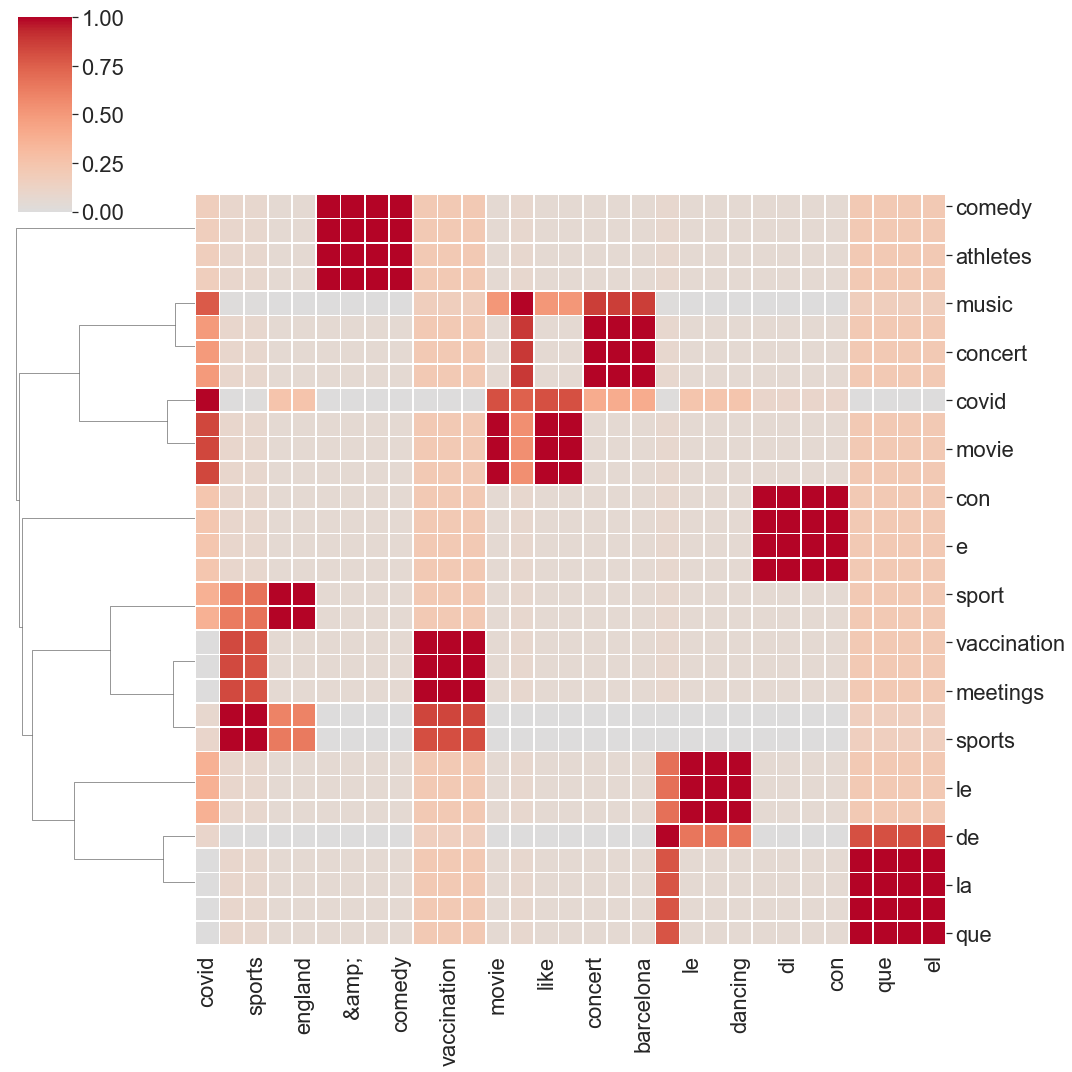

In [110]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="coolwarm", metric='cosine', linewidths=.75, figsize=(15, 15), col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

C:\Users\SRam\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [112]:
#dataset = pd.read_csv('tweets_by_date_mar29_art_entertainment.csv')
df4.head()
#df4_1.head()
dataset=df4
dataset.head()

,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,0,0,1322794208999124992,1.604210e+12,2020-11-01 01:54:50,"Tokyo International Film Festival promises to amp up courage amid Covid-19 pandemic, taps into ‘power of the arts’ – art and culture https://t.co/mSMtSgojRy",en,[],[],1039938801387413504,['https://indiatourtips.com/tokyo-international-film-festival-promises-to-amp-up-courage-amid-covid-19-pandemic-taps-into-power-of-the-arts-art-and-culture/'],False,"tokyo international film festival promises amp courage amid covid-19 pandemic, taps ‘power arts’ – art culture",0.000000,0.000000,Neutral,Fact,Venues
1,1,1,1322858462045351937,1.604229e+12,2020-11-01 06:10:09,KONIKLOS - on reviendra pour danser des slows avec vous n en déplaise au Covid et aux censeurs des contacts humains!! ❤️💋 Photo #LénaVaillant De et avec #JadeCoco #lamecaniquedeslimbes #theatre #culture #feminisme #humanite #slows #boom #art #performance https://t.co/bw1TXEbwJl,fr,"['lénavaillant', 'jadecoco', 'lamecaniquedeslimbes', 'theatre', 'culture', 'feminisme', 'humanite', 'slows', 'boom', 'art', 'performance']",[],999980600,[],False,koniklos - reviendra pour danser des slows avec vous n en déplaise au covid et aux censeurs des contacts humains!! ️ photo lénavaillant de et avec jadecoco lamecaniquedeslimbes theatre culture feminisme humanite slows boom art performance,0.000000,0.000000,Neutral,Fact,Activities
2,2,2,1322872793789308929,1.604232e+12,2020-11-01 07:07:06,Sands Films Studio https://t.co/4mLpYG1KvB Sands Films will continue to deliver art and culture whilst respecting the Covid-19 restrictions. Great!: We Continue! Visit our site to catch up with last Thursday wonderful film about Cuba and Cuban music.,en,[],[],1020362925415034880,['https://www.sandsfilms.co.uk/studio-live.html'],False,sands films studio sands films continue deliver art culture whilst respecting covid-19 restrictions. great!: we continue! visit site catch last thursday wonderful film cuba cuban music.,0.605556,0.666667,Positive,Opinion,Venues
3,3,3,1322992123369656320,1.604261e+12,2020-11-01 15:01:16,"@Brevesdepresse Pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la Française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané Covid.",fr,[],[],119855775,[],False,"pour résumer, ce n'est pas l'islamisme radical qui avoir la peau de notre art de vivre à la française, la culture, la fêtes, les bars, les bons restaurants, les repas en famille, les discothèques c'est le satané covid.",0.000000,0.000000,Neutral,Fact,Activities
4,4,4,1323105081990897664,1.604288e+12,2020-11-01 22:30:08,im obsessed with phasmophobia because it's the only thrilling experience i can feel nowadays since amusement parks are covid breeding centers,en,[],[],1204134093169942528,[],False,im obsessed phasmophobia thrilling experience feel nowadays since amusement parks covid breeding centers,1.000000,-0.125000,Negative,Opinion,Performances


In [113]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20489.0,1.024400e+04,5.914809e+03,0.000000e+00,5.122000e+03,1.024400e+04,1.536600e+04,2.048800e+04
Unnamed: 0.1,20489.0,1.024429e+04,5.915164e+03,0.000000e+00,5.122000e+03,1.024400e+04,1.536700e+04,2.048900e+04
id,20489.0,1.369448e+18,1.141234e+16,1.322794e+18,1.369912e+18,1.374349e+18,1.376087e+18,1.376686e+18
created_at,20489.0,1.615337e+12,2.720915e+09,1.604210e+12,1.615447e+12,1.616505e+12,1.616920e+12,1.617062e+12
user_id,20489.0,4.339362e+17,5.594647e+17,2.900000e+03,1.731230e+08,2.251383e+09,1.050000e+18,1.376555e+18
Subjectivity,20489.0,3.378376e-01,2.843217e-01,0.000000e+00,0.000000e+00,3.583333e-01,5.312500e-01,1.000000e+00
Polarity,20489.0,8.423554e-02,2.426178e-01,-1.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,1.000000e+00


In [114]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index(['created_at', 'Subjectivity', 'Polarity'], dtype='object')


In [125]:

##Next, I want to compare the relationship (Correlation) between the identified topics in the dataset.

sns.pairplot(dataset[['Venues','Performances','Health','Activities','Enjoyment']])

plt.show()

KeyError: "None of [Index(['Venues', 'Performances', 'Health', 'Activities', 'Enjoyment'], dtype='object')] are in the [columns]"

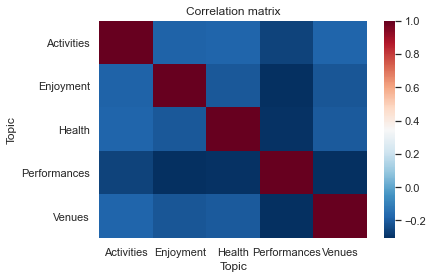

In [126]:
#This is another visual representation of Correlation Matrix to use
## SELECT COLORS https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


corrMatrix = pivoted.corr()

sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=False,
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            cmap='RdBu_r'
            )
plt.title('Correlation matrix')
plt.show()

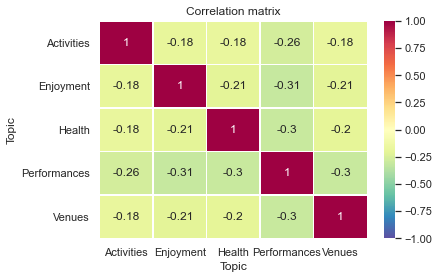

In [127]:
#This is another visual representation of Correlation Matrix to use
sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='Spectral_r',square=False, vmin = -1, vmax = 1)
plt.title('Correlation matrix')

plt.show()

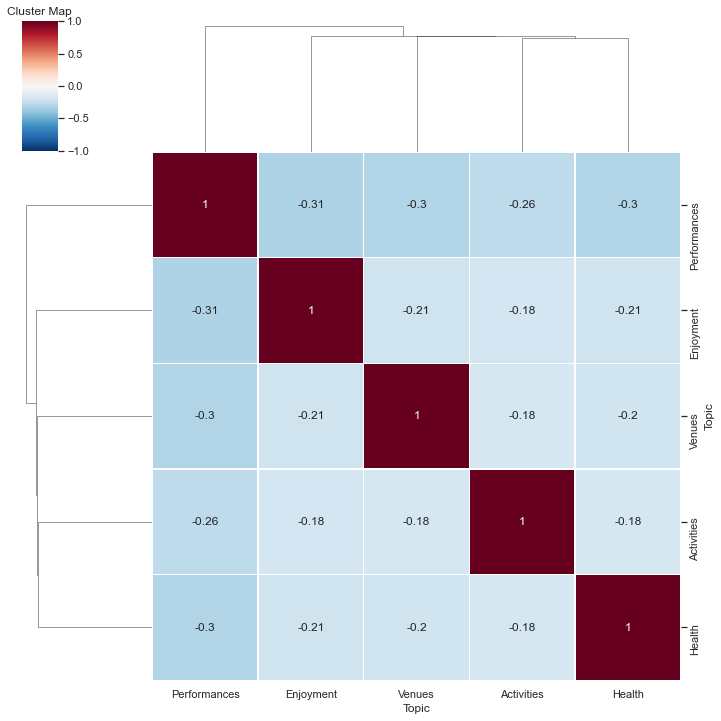

In [128]:
# Create cluter map
sns.clustermap(corrMatrix, annot=True, linewidth = 0.5, cmap='RdBu_r',square=False, vmin = -1, vmax = 1)
plt.title('Cluster Map')

plt.show()

In [130]:
corrMatrix

Topic,Activities,Enjoyment,Health,Performances,Venues
Topic,,,,,
Activities,1.000000,-0.180418,-0.176602,-0.259160,-0.177820
Enjoyment,-0.180418,1.000000,-0.205776,-0.307032,-0.210302
Health,-0.176602,-0.205776,1.000000,-0.297536,-0.200971
Performances,-0.259160,-0.307032,-0.297536,1.000000,-0.303494
Venues,-0.177820,-0.210302,-0.200971,-0.303494,1.000000


In [131]:
corrMatrix.to_csv('clean.csv')